# Pixel Level Image Transformation Example with Pillow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Load Image

In [2]:
img_path = '../Images/Traffic/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png'

In [3]:
img = Image.open(img_path)

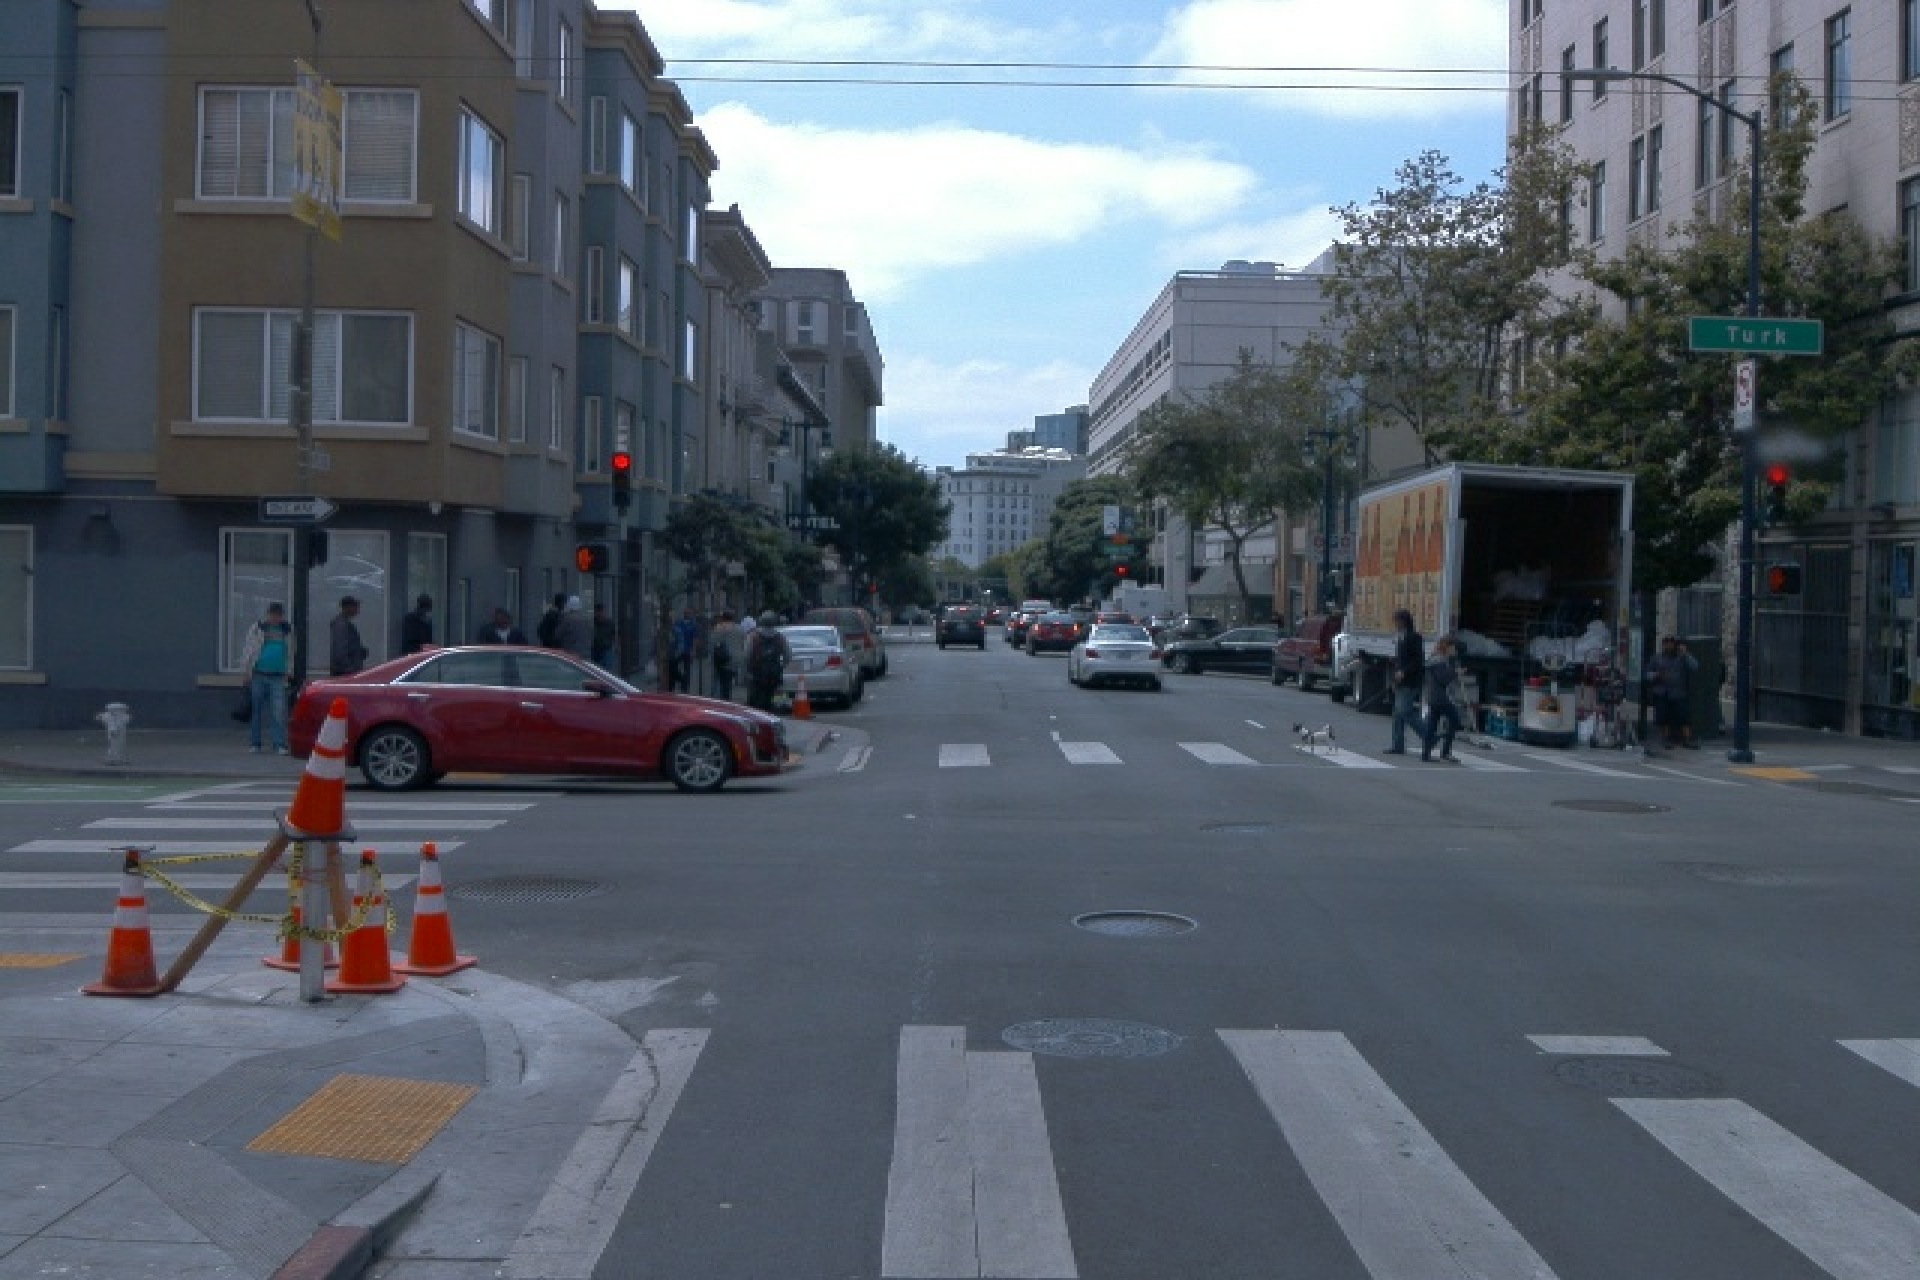

In [4]:
img

A pillow image contains metadata, or attributes, such as size and name

In [5]:
print(f"Above Image is {img.mode} image, dimensions are {img.size}, file location is {img.filename}")


Above Image is RGB image, dimensions are (1920, 1280), file location is ../Images/Traffic/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png


### Convert to RGB

In [18]:
img_rgb = img.convert('RGB')

### Convert to Grayscale

In [6]:
img_gray = img.convert('L')

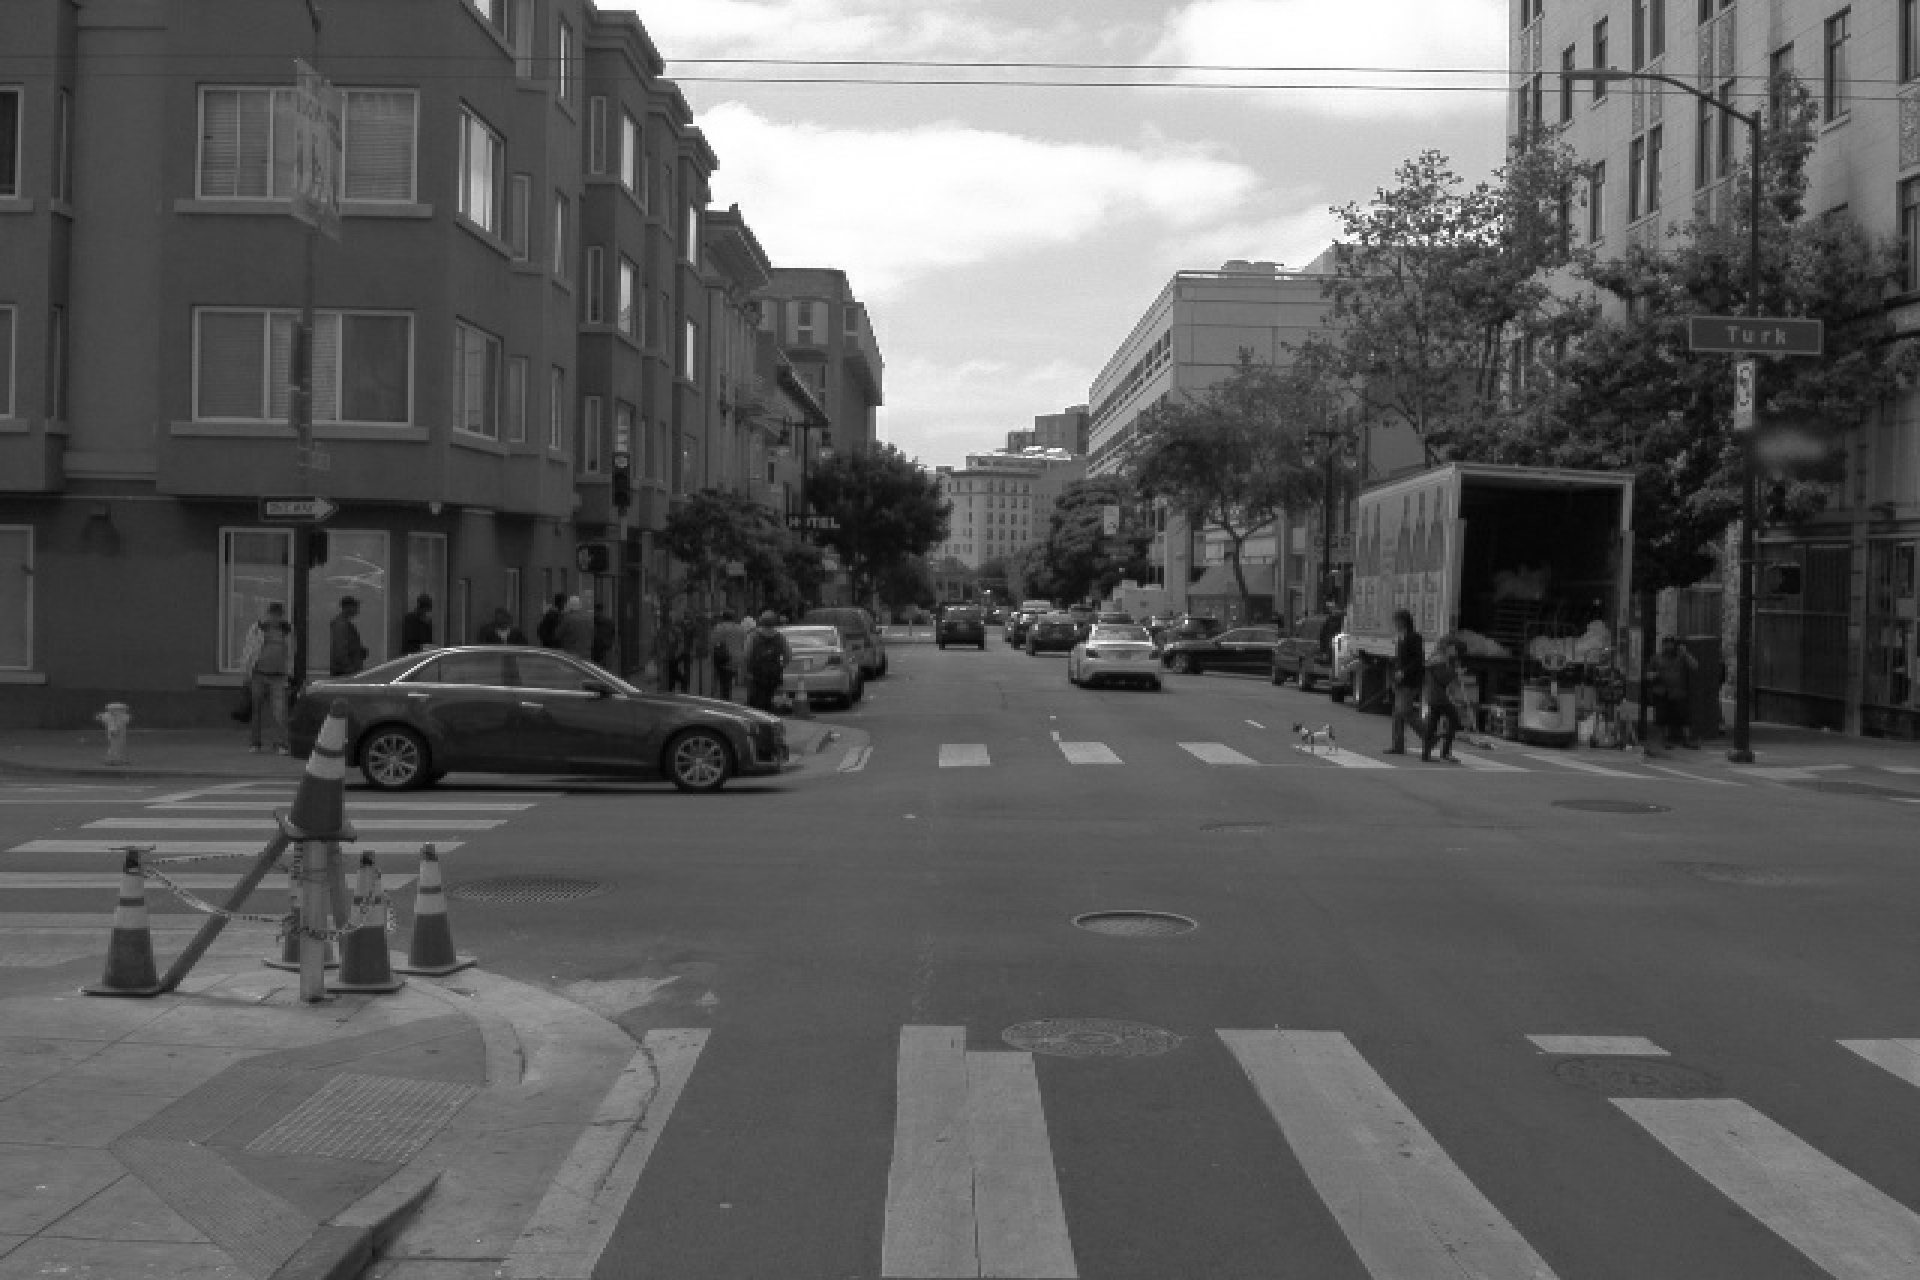

In [7]:
img_gray

In [11]:
# Convert to HSV.  
# We cannot display it, however we can still manipulate it
img_hsv = img.convert('HSV')

### Color Thresholding

Try to mask everything but the red car.  Use HSV image because it is easier to isolate colors

In [13]:
img_arr = np.array(img_hsv)
# Isolate Hue Channel
img_hsv_hue = img_arr[:,:,0]

Pillow converted HSV image to have 3 channels containing 8 pixels. Because of that we need to convert the car's red hue (~340) in the same scale

In [16]:
red_hue = (img_hsv_hue > 230).astype(np.uint8)

Mask the RGB Image

In [20]:
masked_rgb_img = np.array(img_rgb * np.stack([red_hue]*3, axis=2))

# Emphasize the read color
masked_rgb_img *= 2

Convert back to Pillow Image

In [21]:
img_mask = Image.fromarray(masked_rgb_img)

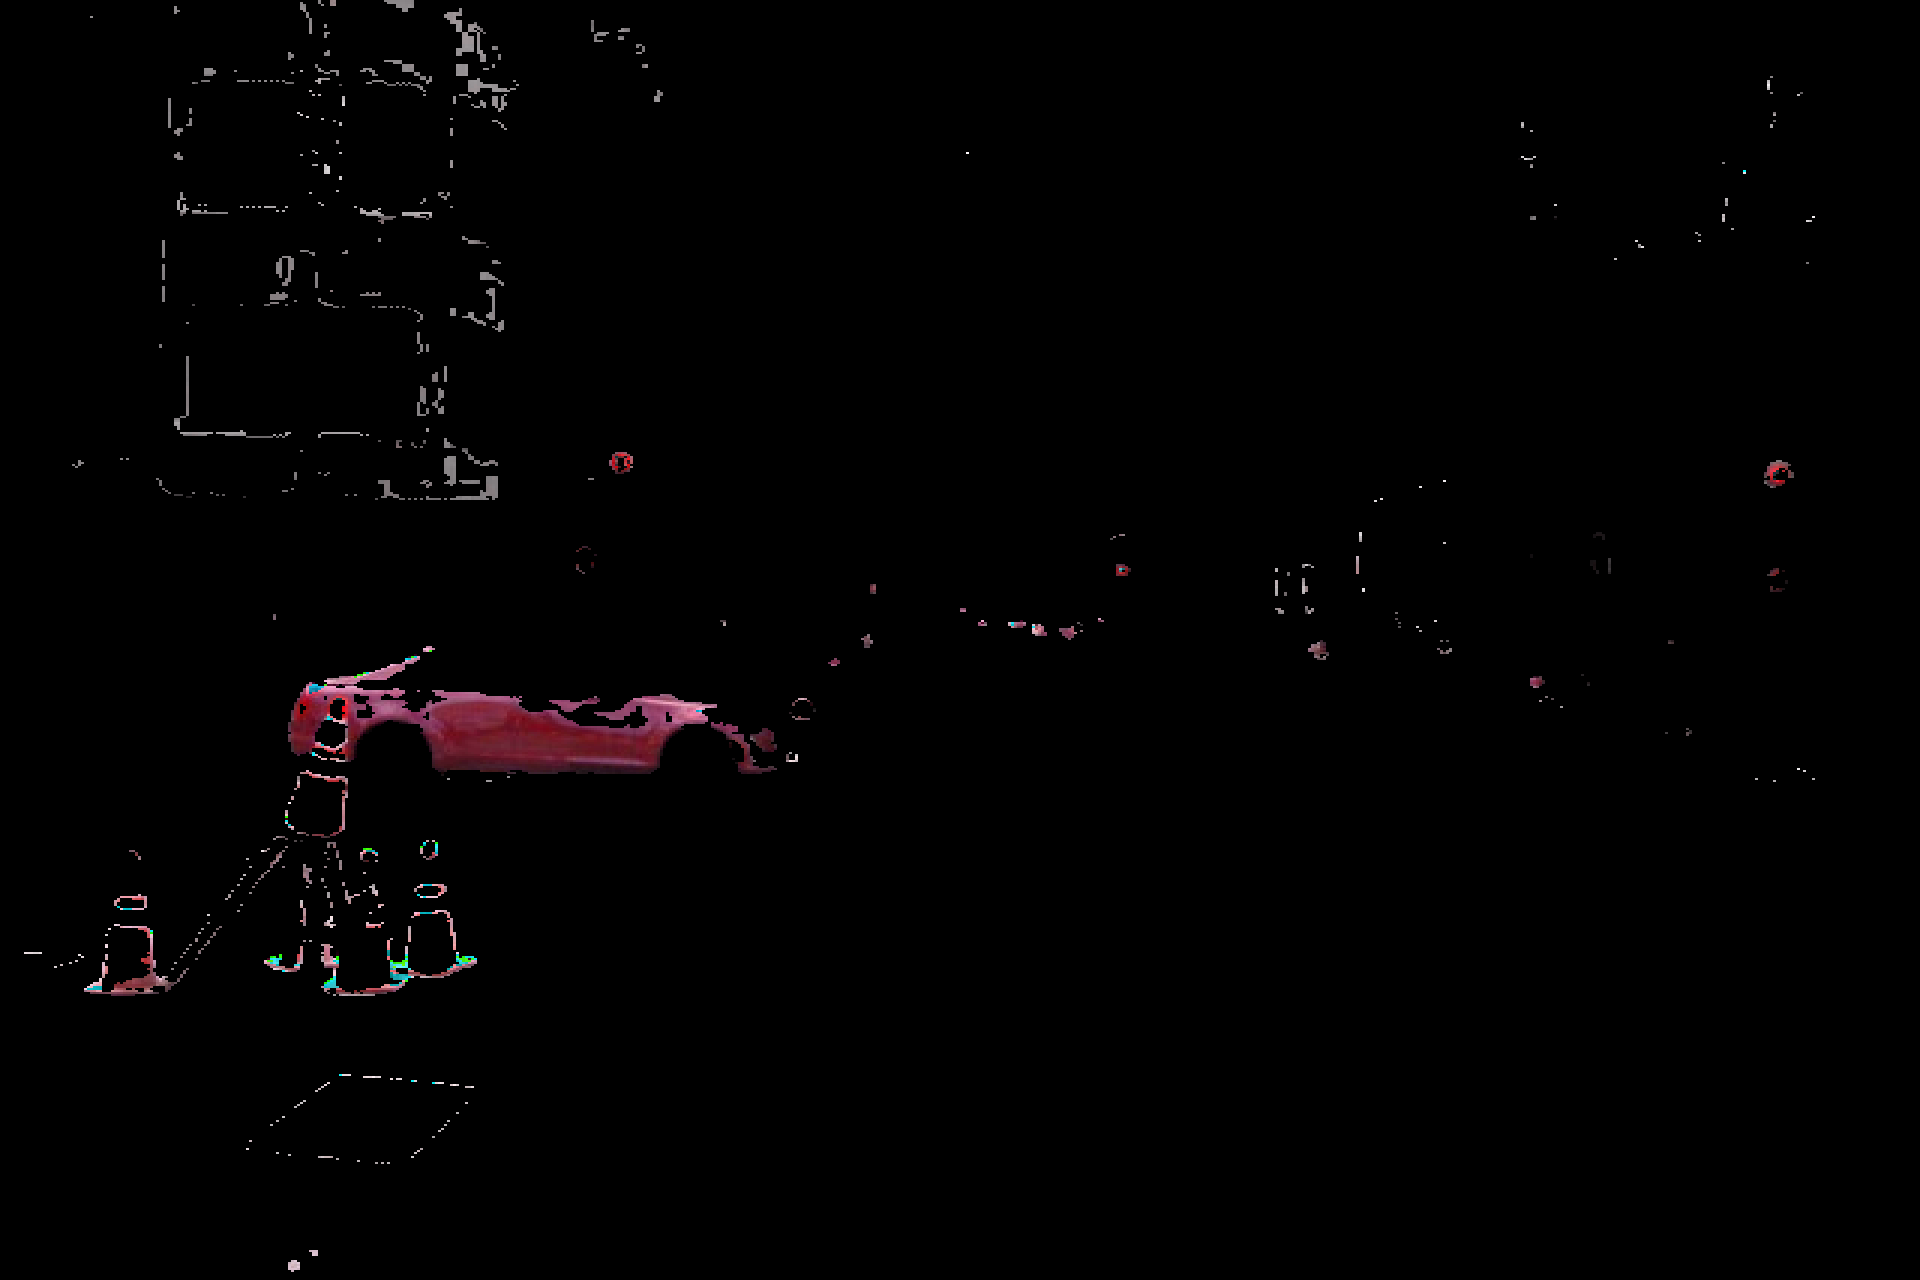

In [23]:
img_mask